<a href="https://colab.research.google.com/github/EungyuHan/23_1_Database/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/HR_Analytics_preprocessing.csv')

In [ ]:
attrition_yes_data = data[data['Attrition'] == 'Yes']

In [3]:
Y = data['Attrition']

X = data.drop('Attrition', axis=1).copy()

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder =  LabelEncoder()

categorical_features = X.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])
X.head()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cut,FarFromHome,LowMonthlyIncome,LowWorkingYears,TotalSatisfaction
0,2,1102,1,2,1,0,94,0,2,7,...,0,6,4,0,5,2,0,0,0,4
1,1,279,8,1,1,1,61,2,2,6,...,2,10,7,1,7,3,0,0,0,6
2,2,1373,2,2,4,1,92,2,1,2,...,2,0,0,0,0,2,0,1,0,6
3,1,1392,3,4,1,0,56,0,1,6,...,2,8,7,3,0,1,0,1,0,7
4,2,591,2,1,3,1,40,0,1,2,...,2,2,2,2,2,1,0,0,0,4


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score, confusion_matrix, precision_score
def model_score(y_test, predict):
    print('Accuracy : ',round(accuracy_score(y_test, predict), 3))
    print('Recall : ',round(recall_score(y_test, predict,pos_label = 'Yes'), 3))
    print('Precision : ',round(precision_score(y_test, predict,pos_label = 'Yes'), 3))
    print('F1_Score : ',round(f1_score(y_test, predict,pos_label = 'Yes'), 3))
    print()
    print('Confusion_matrix :')
    print(confusion_matrix(y_test, predict))

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'accuracy'):

    plt.figure(figsize = (12,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt.show() 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'criterion': ['gini', 'entropy'],       # 불순도 측정 기준
    'splitter': ['best', 'random'],         # 노드 분할 전략
    'max_depth': list(range(0, 11)) + [None],           # 트리의 최대 깊이
    'min_samples_split': range(0,11),        # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': range(0,11),          # 리프 노드를 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2', None]   # 최대 특성 개수
}

random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score = True,
    random_state=42
)

random_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': range(0, 11),
                                        'min_samples_split': range(0, 11),
                                        'splitter': ['best', 'random']},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [ ]:
dtc_best_model = random_search.best_estimator_
dtc_best_params = random_search.best_params_

dtc_best_model.fit(X_train, Y_train)
dtc_predict = dtc_best_model.predict(X_test)

model_score(Y_test.values, dtc_predict)
print(dtc_best_params)

Accuracy :  0.833
Recall :  0.14
Precision :  0.5
F1_Score :  0.219

Confusion_matrix :
[[276   8]
 [ 49   8]]
{'splitter': 'random', 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}


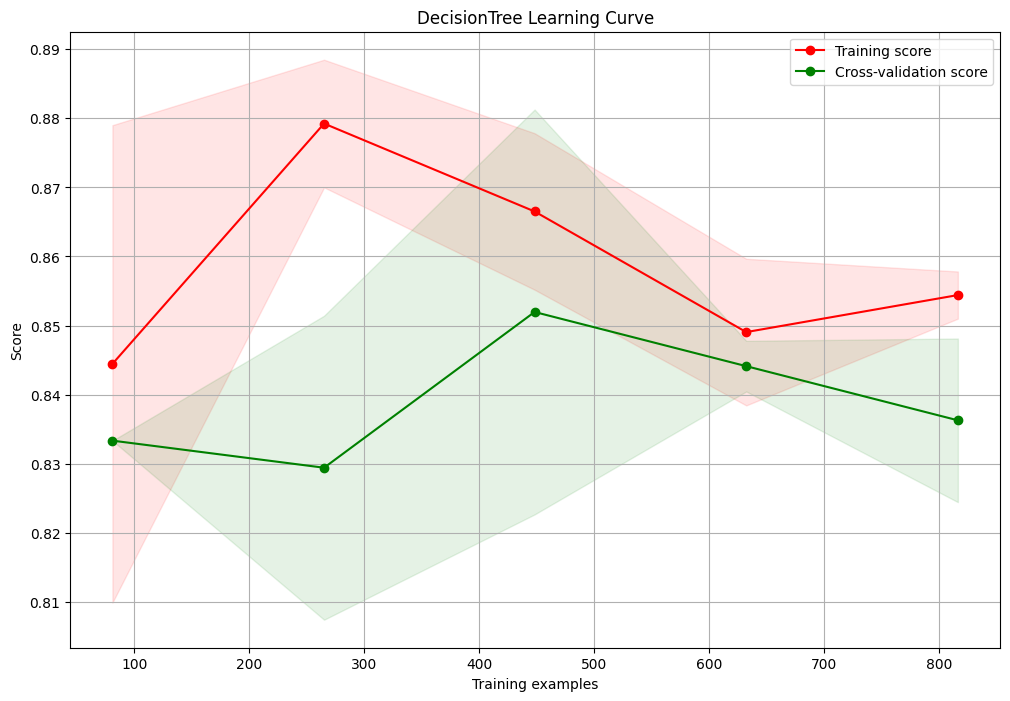

In [ ]:
plot_learning_curve(dtc_best_model, 'DecisionTree Learning Curve', X_train, Y_train, cv=5)

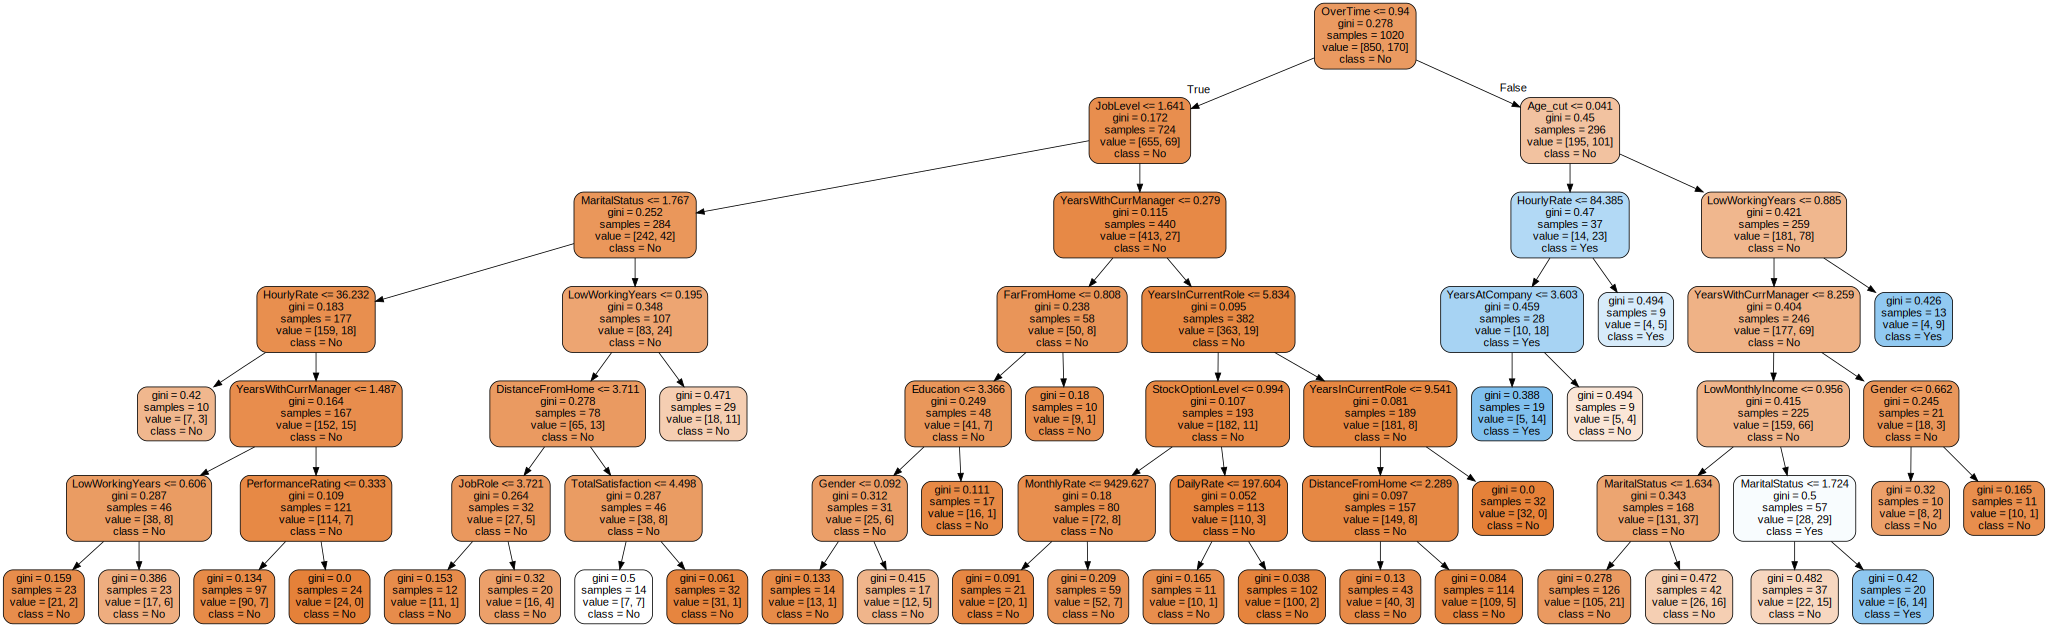

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# 결정 트리 시각화
dot_data = export_graphviz(dtc_best_model, out_file=None, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
display(graph)


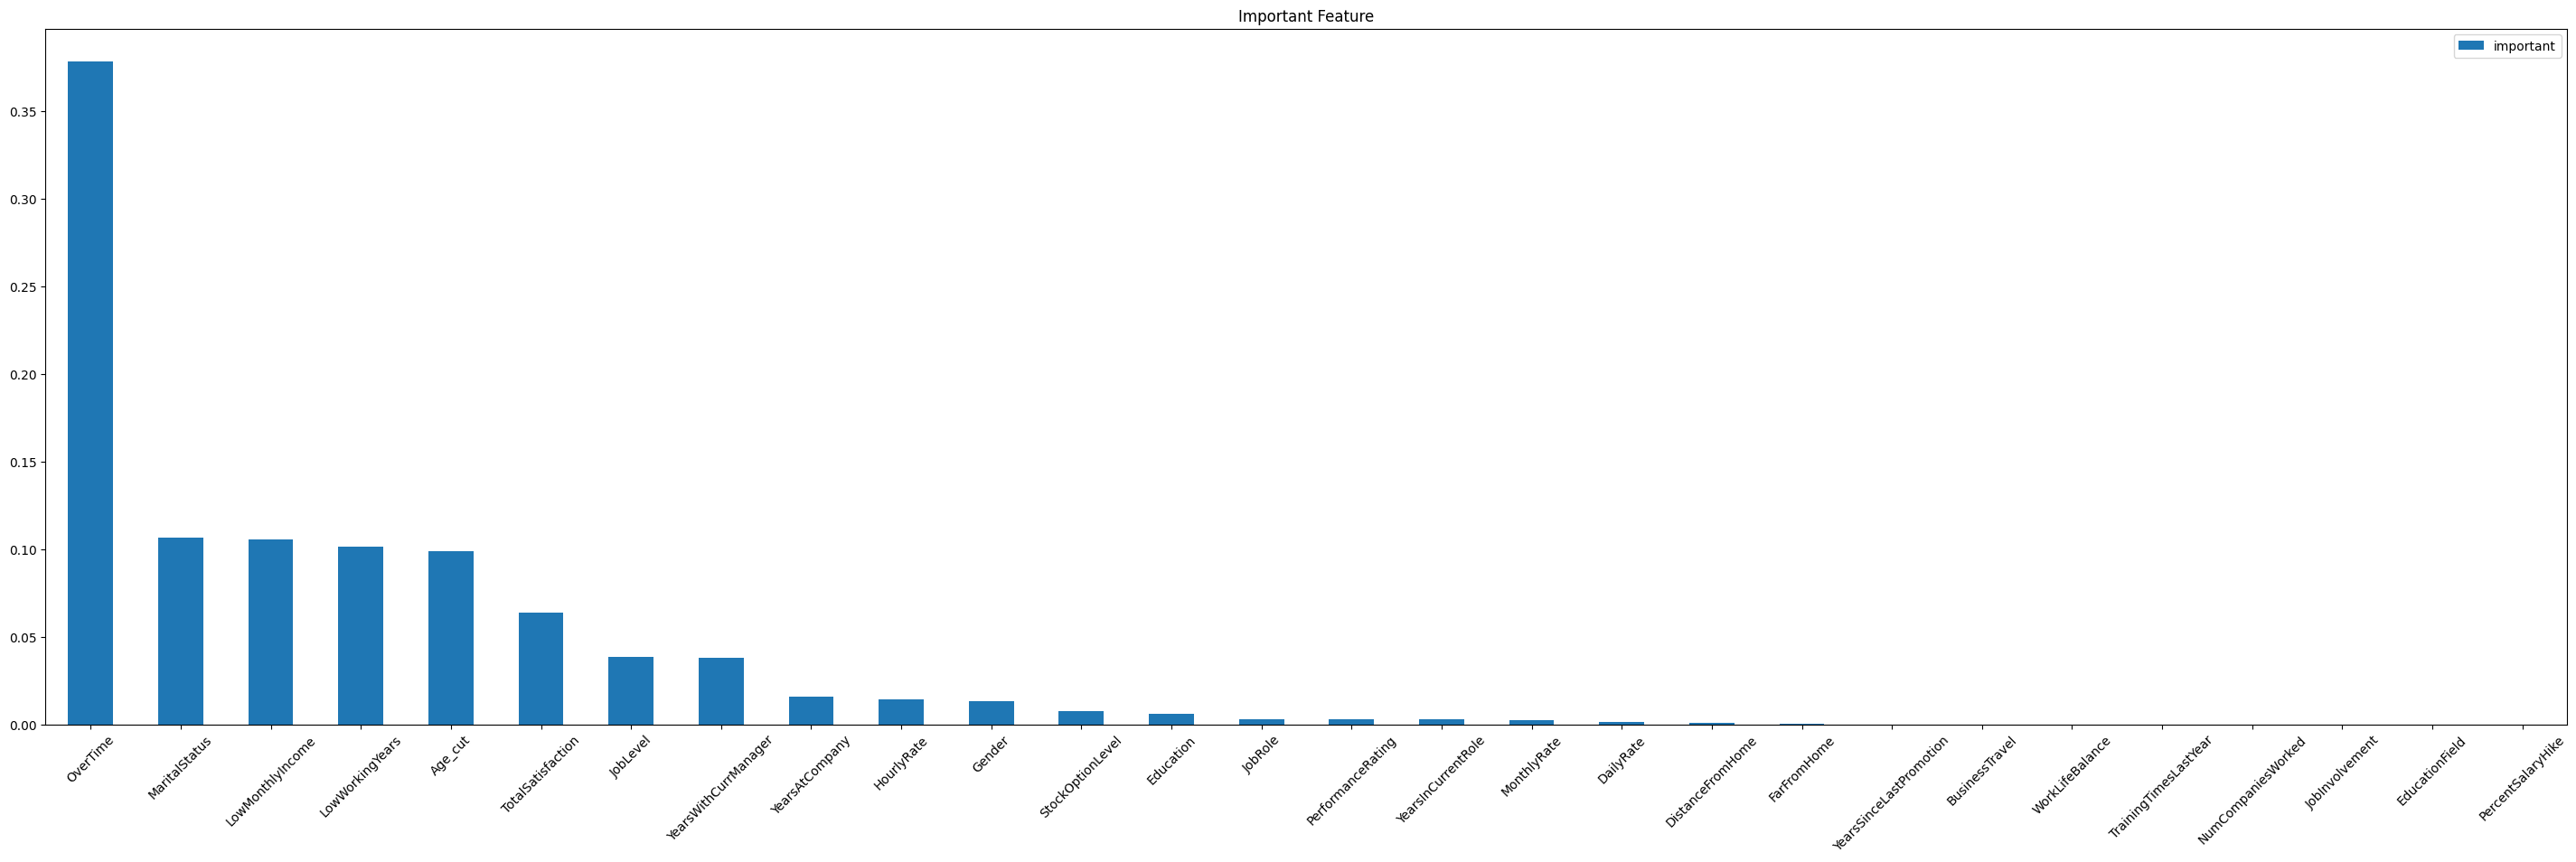

In [ ]:
feature_importance = dtc_best_model.feature_importances_

pd.DataFrame(feature_importance, X_train.columns,columns=['important']).sort_values(by = 'important', ascending=False).plot(kind='bar', figsize = (36, 10), rot = 45, title ='Important Feature')
plt.show()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],       # 불순도 측정 기준
    'max_depth': list(range(0, 11)) + [None],           # 트리의 최대 깊이
    'min_samples_split': range(0,11),        # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': range(0,11),          # 리프 노드를 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2', None]   # 최대 특성 개수
}

random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid,
    n_iter=5,
    n_jobs = -1,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score = True,
    random_state=42
)

random_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': range(0, 11),
                                        'min_samples_split': range(0, 11)},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [ ]:
rfc_best_model = random_search.best_estimator_
rfc_best_params = random_search.best_params_

rfc_best_model.fit(X_train, Y_train)
rfc_predict = rfc_best_model.predict(X_test)

# model_score(Y_test.values, rfc_predict)
print(rfc_best_params)

{'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
no_predictions = X_test[rfc_predict == "No"]
print(no_predictions)
yes_counts = 0
no_counts = 0

# for i in no_predictions:
#   print(i)
#     data_encoded = label_encoder.transform([data])

#     yes_count = sum(tree.predict([data])[0] == "Yes" for tree in rfc_best_model.estimators_)
#     no_count = sum(tree.predict([data])[0] == "No" for tree in rfc_best_model.estimators_)
    
#     yes_counts += yes_count
#     no_counts += no_count

# # "Yes"와 "No"로 결론을 내린 트리의 개수를 비율로 변환
# yes_ratio = yes_counts / len(no_predictions)
# no_ratio = no_counts / len(no_predictions)

# print("Yes로 결론을 내린 트리의 비율:", yes_ratio)
# print("No로 결론을 내린 트리의 비율:", no_ratio)


      BusinessTravel  DailyRate  DistanceFromHome  Education  EducationField  \
236                2        833                 1          0               1   
598                2        672                25          0               5   
1199               2       1092                10          0               3   
246                2       1403                 6          0               1   
65                 1       1225                 1          1               1   
...              ...        ...               ...        ...             ...   
1235               2        835                19          4               4   
930                2       1136                 1          4               3   
648                2       1053                 1          2               1   
550                2        890                 2          4               3   
1230               2        352                 6          1               3   

      Gender  HourlyRate  JobInvolvemen

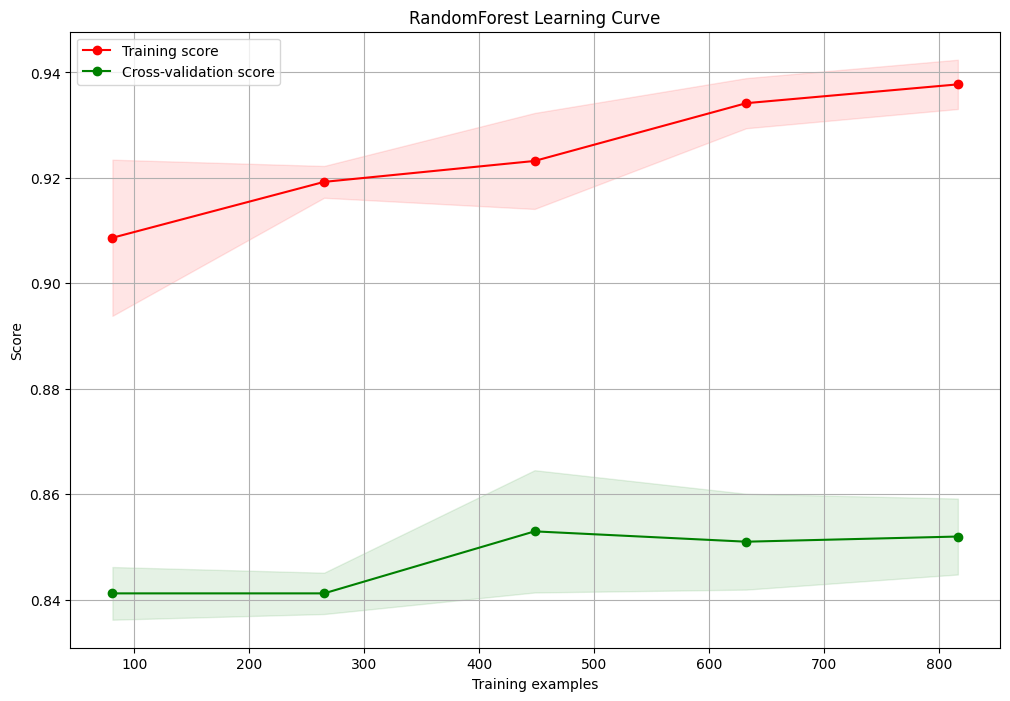

In [ ]:
plot_learning_curve(rfc_best_model, 'RandomForest Learning Curve', X_train, Y_train, cv=5)

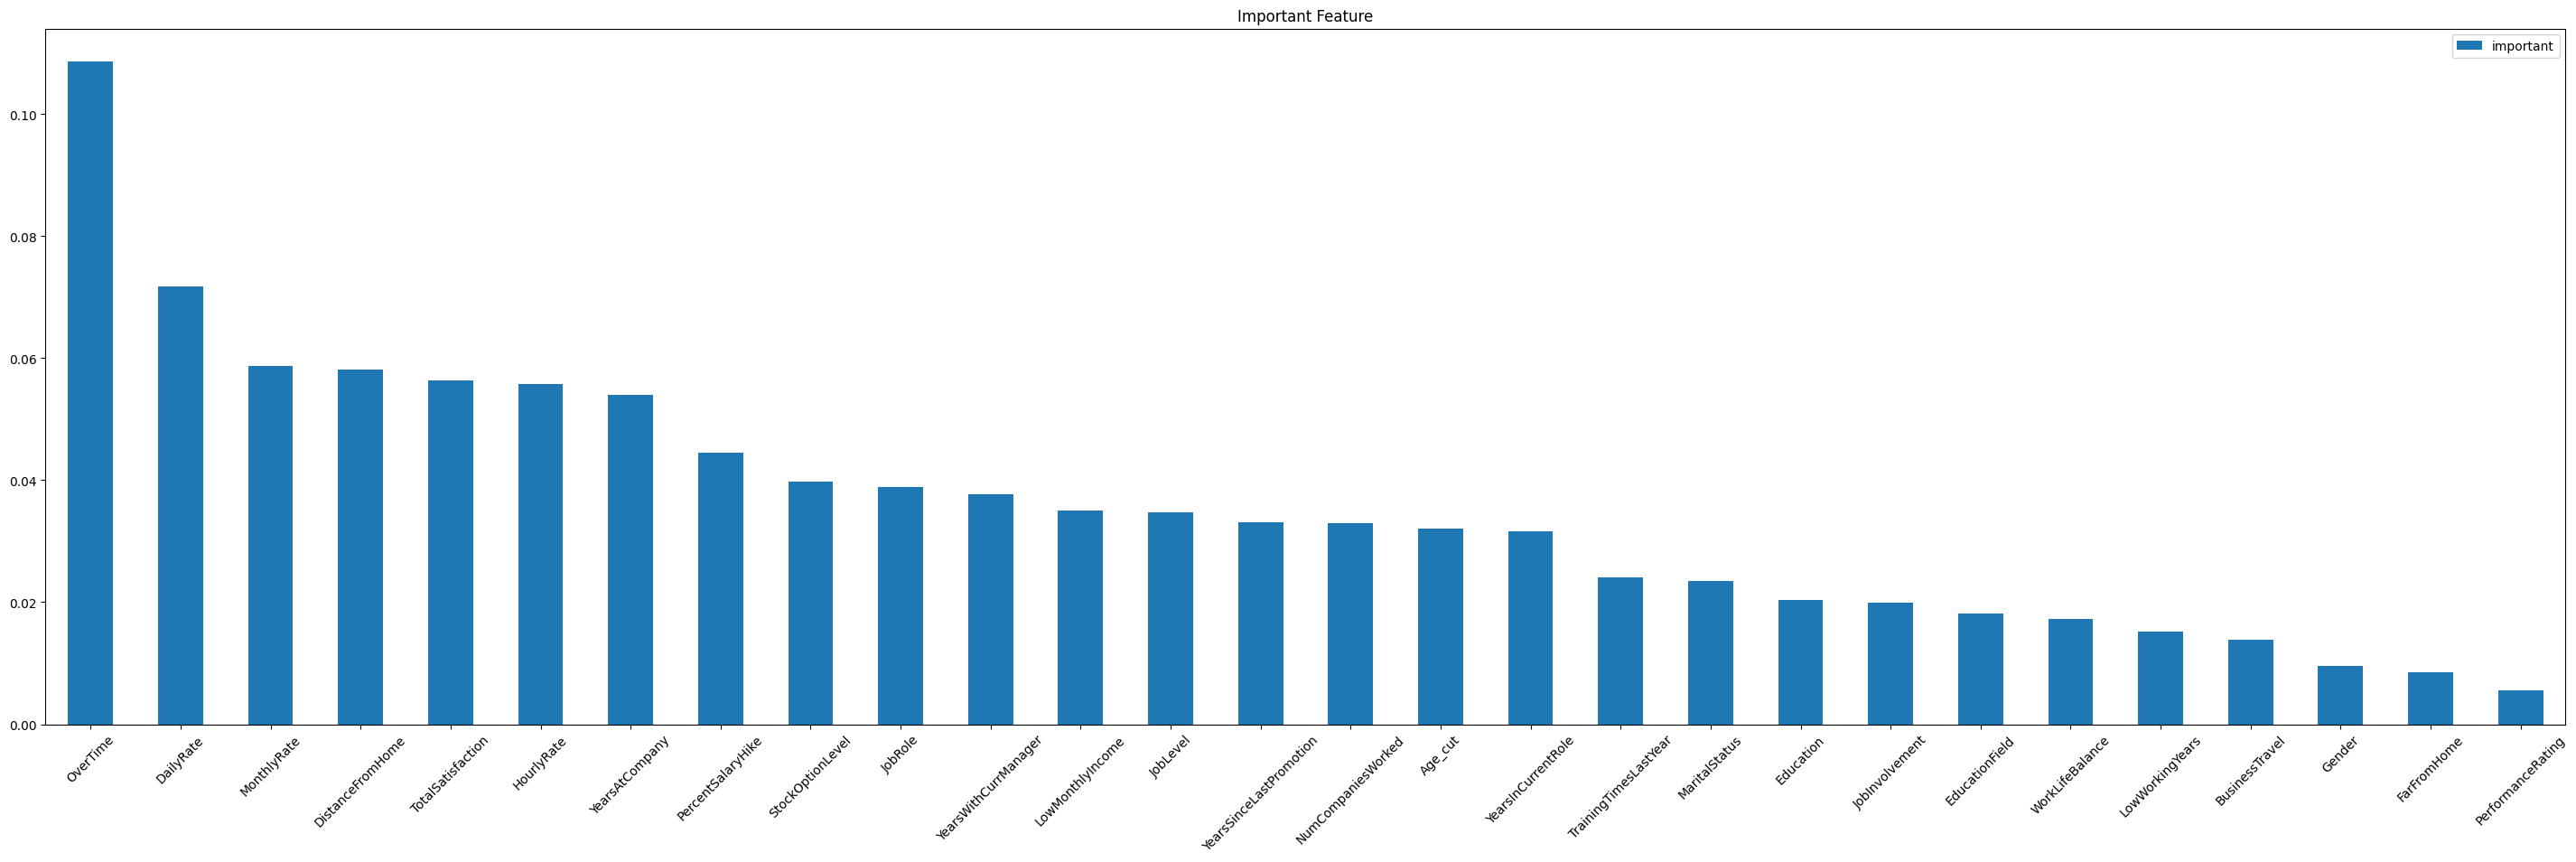

In [ ]:
feature_importance = rfc_best_model.feature_importances_

pd.DataFrame(feature_importance, X_train.columns,columns=['important']).sort_values(by = 'important', ascending=False).plot(kind='bar', figsize = (36, 10), rot = 45, title ='Important Feature')
plt.show()

In [ ]:
param_grid = {
    'max_depth': range(1,11),  # 트리의 최대 깊이
    'learning_rate': np.arange(0.001,0.1,0.001),  # 학습률
    'n_estimators': range(100,301,50),  # 트리의 개수
    'subsample': np.arange(0,1,0.1),  # 각 트리마다 사용되는 훈련 데이터의 샘플링 비율
    'colsample_bytree': np.arange(0.1,1,0.1),  # 각 트리마다 사용되는 특성의 샘플링 비율
    'gamma': np.arange(0.1,1,0.1),  # 트리의 가지를 나누기 위한 최소 손실 감소량
    'reg_alpha': np.arange(0.1,1,0.1),  # L1 규제 (Lasso) 항의 가중치
    'reg_lambda': np.arange(0.1,1,0.1)  # L2 규제 (Ridge) 항의 가중치
}

Y_train_encoded = label_encoder.fit_transform(Y_train)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs = -1,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score = True,
    random_state=42
)

random_search.fit(X_train,Y_train_encoded)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
                                        'max_depth': range(1, 11),
                                        'n_estimators': range(100, 301, 50),
                                        'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'reg_lambda': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [ ]:
def model_score(y_test, predict):
    print('Accuracy : ',round(accuracy_score(y_test, predict), 3))
    print('Recall : ',round(recall_score(y_test, predict,pos_label = 1), 3))
    print('Precision : ',round(precision_score(y_test, predict,pos_label = 1), 3))
    print('F1_Score : ',round(f1_score(y_test, predict,pos_label = 1), 3))
    print()
    print('Confusion_matrix :')
    print(confusion_matrix(y_test, predict))

In [ ]:
xgb_best_model = random_search.best_estimator_
xgb_best_params = random_search.best_params_

Y_train_encoded = label_encoder.fit_transform(Y_train)

xgb_best_model.fit(X_train, Y_train_encoded)
xgb_predict = xgb_best_model.predict(X_test)

In [ ]:
Y_test_encoded = label_encoder.fit_transform(Y_test)
model_score(Y_test_encoded, xgb_predict)
print(xgb_best_params)

Accuracy :  0.877
Recall :  0.298
Precision :  0.895
F1_Score :  0.447

Confusion_matrix :
[[282   2]
 [ 40  17]]
{'subsample': 0.8, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0.4, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.099, 'gamma': 0.8, 'colsample_bytree': 0.9}


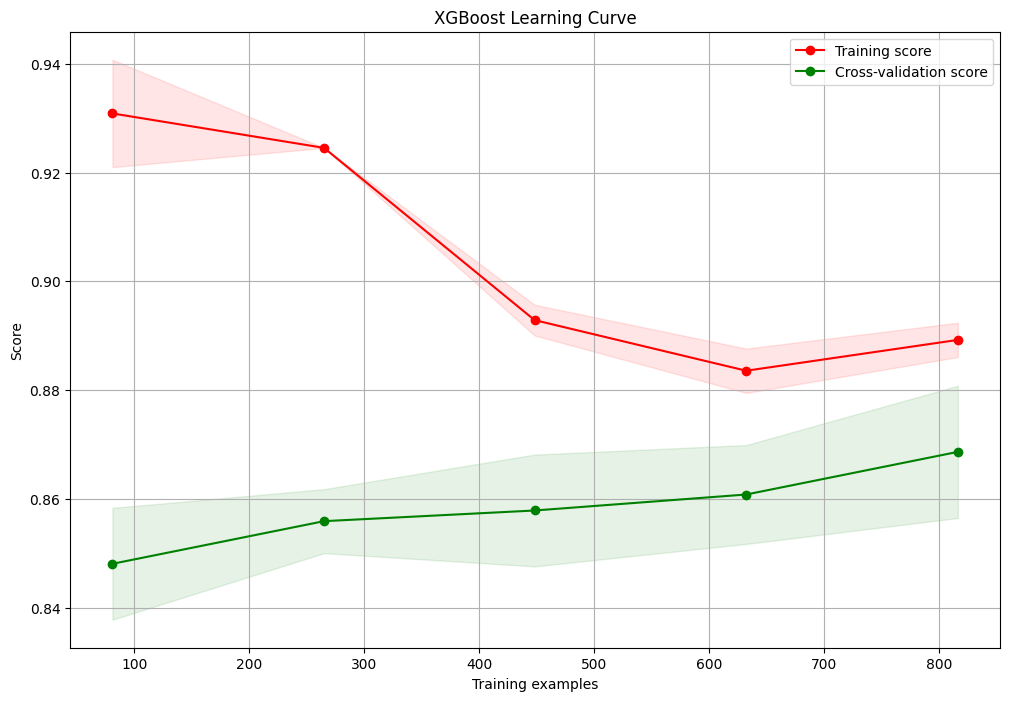

In [ ]:
plot_learning_curve(xgb_best_model, 'XGBoost Learning Curve', X_train, Y_train_encoded, cv=5)

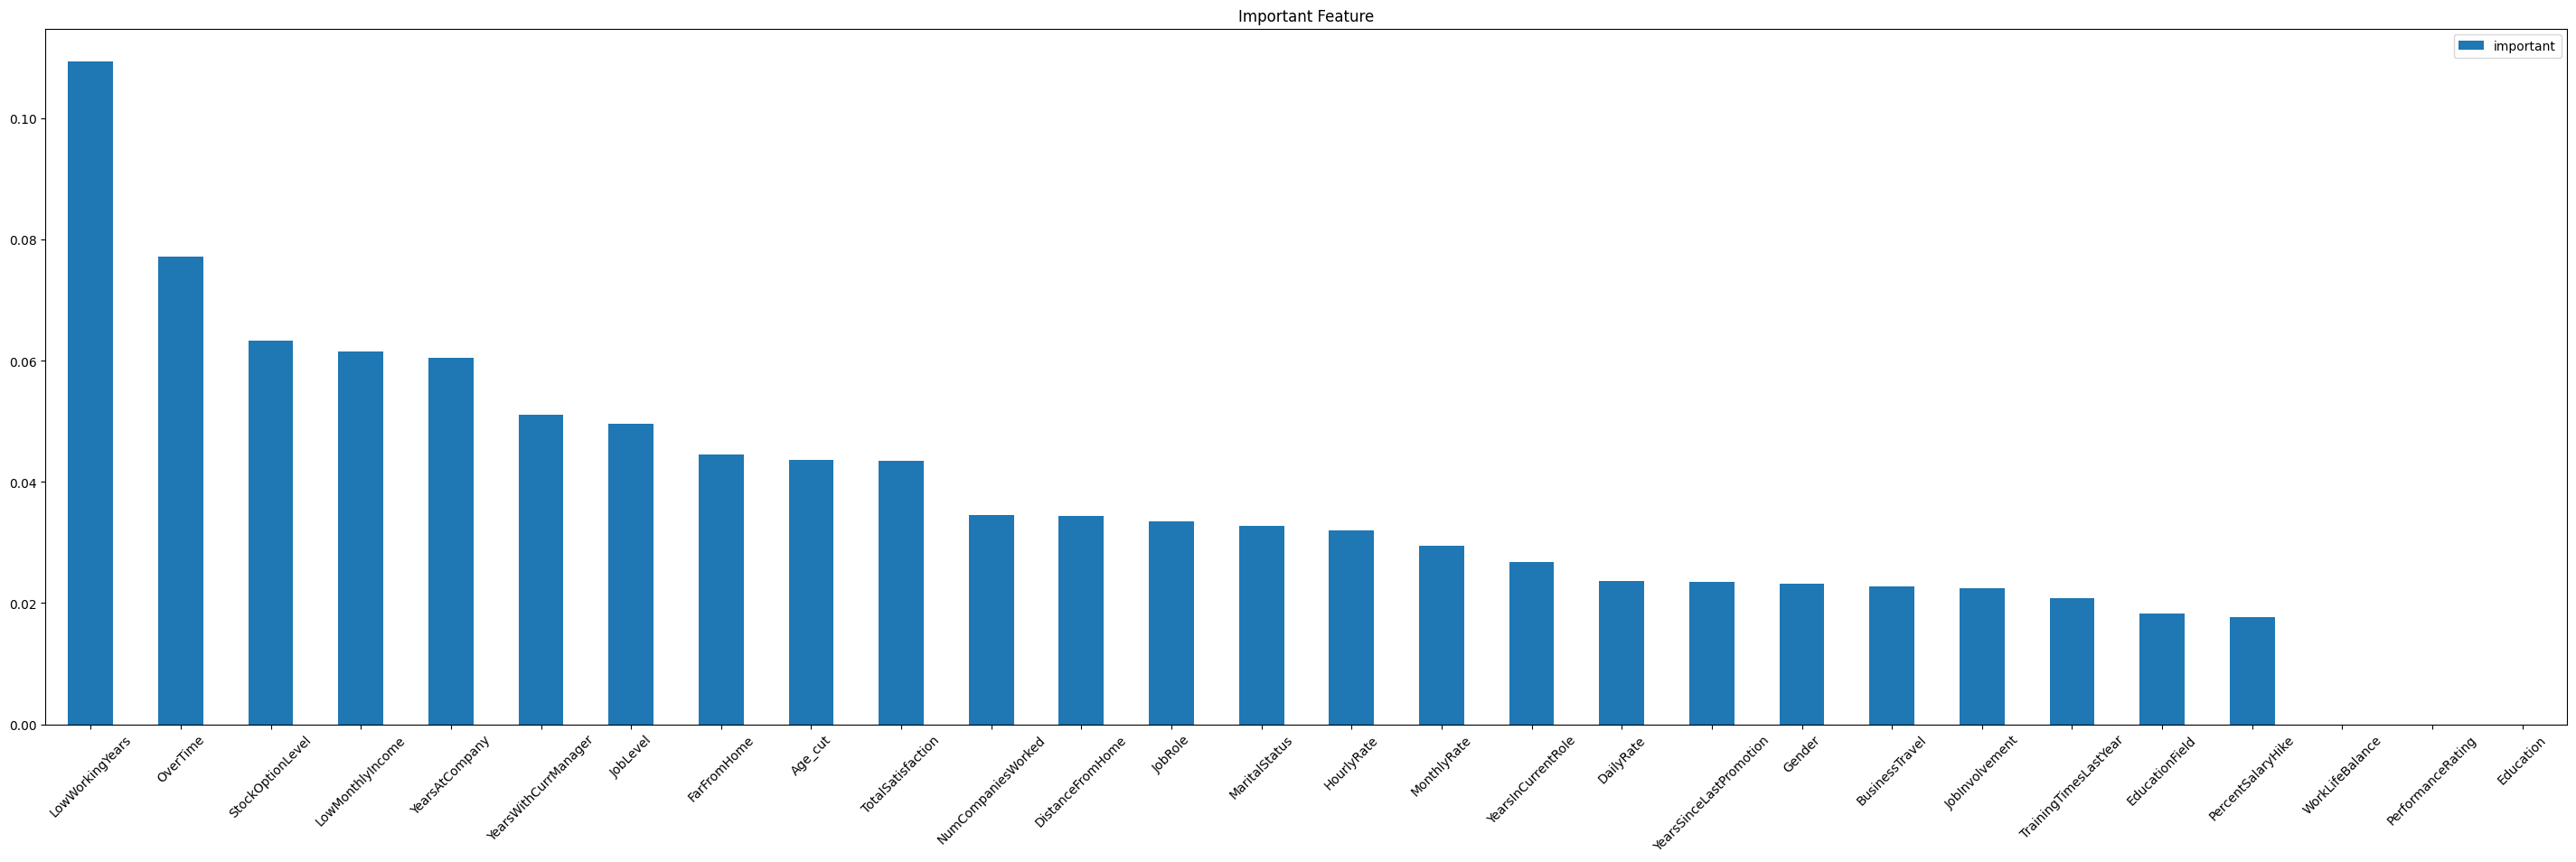

In [ ]:
feature_importance = xgb_best_model.feature_importances_

pd.DataFrame(feature_importance, X_train.columns,columns=['important']).sort_values(by = 'important', ascending=False).plot(kind='bar', figsize = (36, 10), rot = 45, title ='Important Feature')
plt.show()

In [ ]:
param_grid = [{
    'boosting_type': ['gbdt', 'dart', 'rf', 'goss'], # 알고리즘 타입
    'num_leaves': range(1,21), # 잎사귀의 수
    'max_depth': range(1,21), # 깊이의 수
    'reg_alpha': np.arange(0.1,1,0.1), # L1 정규화
    'lambda_l1': np.arange(0.1,1,0.1), # L1 정규화
    'lambda_l2': np.arange(0.1,1,0.1), # L2 정규화
}]

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs = -1,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score = True,
    random_state=42
)

random_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 748, in fit
    self._Booster = train(
  File "/usr/loc

[LightGBM] [Warning] lambda_l1 is set=0.7000000000000001, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0.7000000000000001
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'boosting_type': ['gbdt', 'dart', 'rf',
                                                           'goss'],
                                         'lambda_l1': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                         'lambda_l2': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                         'max_depth': range(1, 21),
                                         'num_leaves': range(1, 21),
                                         'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [ ]:
def model_score(y_test, predict):
    print('Accuracy : ',round(accuracy_score(y_test, predict), 3))
    print('Recall : ',round(recall_score(y_test, predict,pos_label = 'Yes'), 3))
    print('Precision : ',round(precision_score(y_test, predict,pos_label = 'Yes'), 3))
    print('F1_Score : ',round(f1_score(y_test, predict,pos_label = 'Yes'), 3))
    print()
    print('Confusion_matrix :')
    print(confusion_matrix(y_test, predict))

In [ ]:
lgbm_best_model = random_search.best_estimator_
lgbm_best_params = random_search.best_params_

lgbm_best_model.fit(X_train, Y_train)
lgbm_predict = lgbm_best_model.predict(X_test)
model_score(Y_test, lgbm_predict)
print(lgbm_best_params)

Accuracy :  0.856
Recall :  0.263
Precision :  0.682
F1_Score :  0.38

Confusion_matrix :
[[277   7]
 [ 42  15]]
{'reg_alpha': 0.5, 'num_leaves': 9, 'max_depth': 1, 'lambda_l2': 0.2, 'lambda_l1': 0.7000000000000001, 'boosting_type': 'goss'}


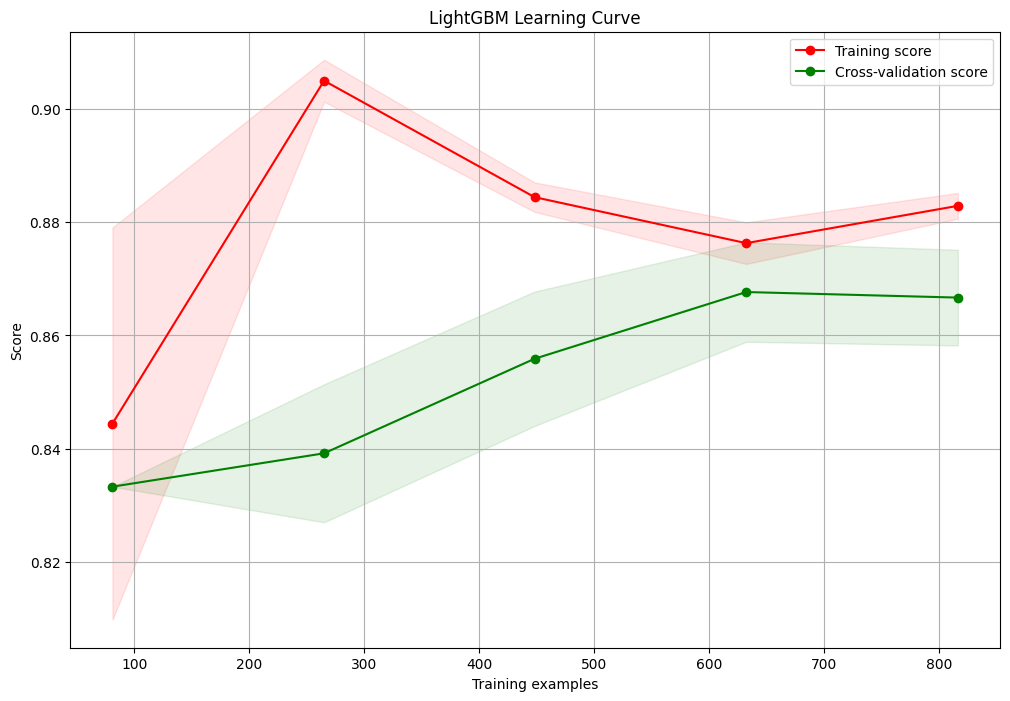

In [ ]:
plot_learning_curve(lgbm_best_model, 'LightGBM Learning Curve', X_train, Y_train, cv=5)

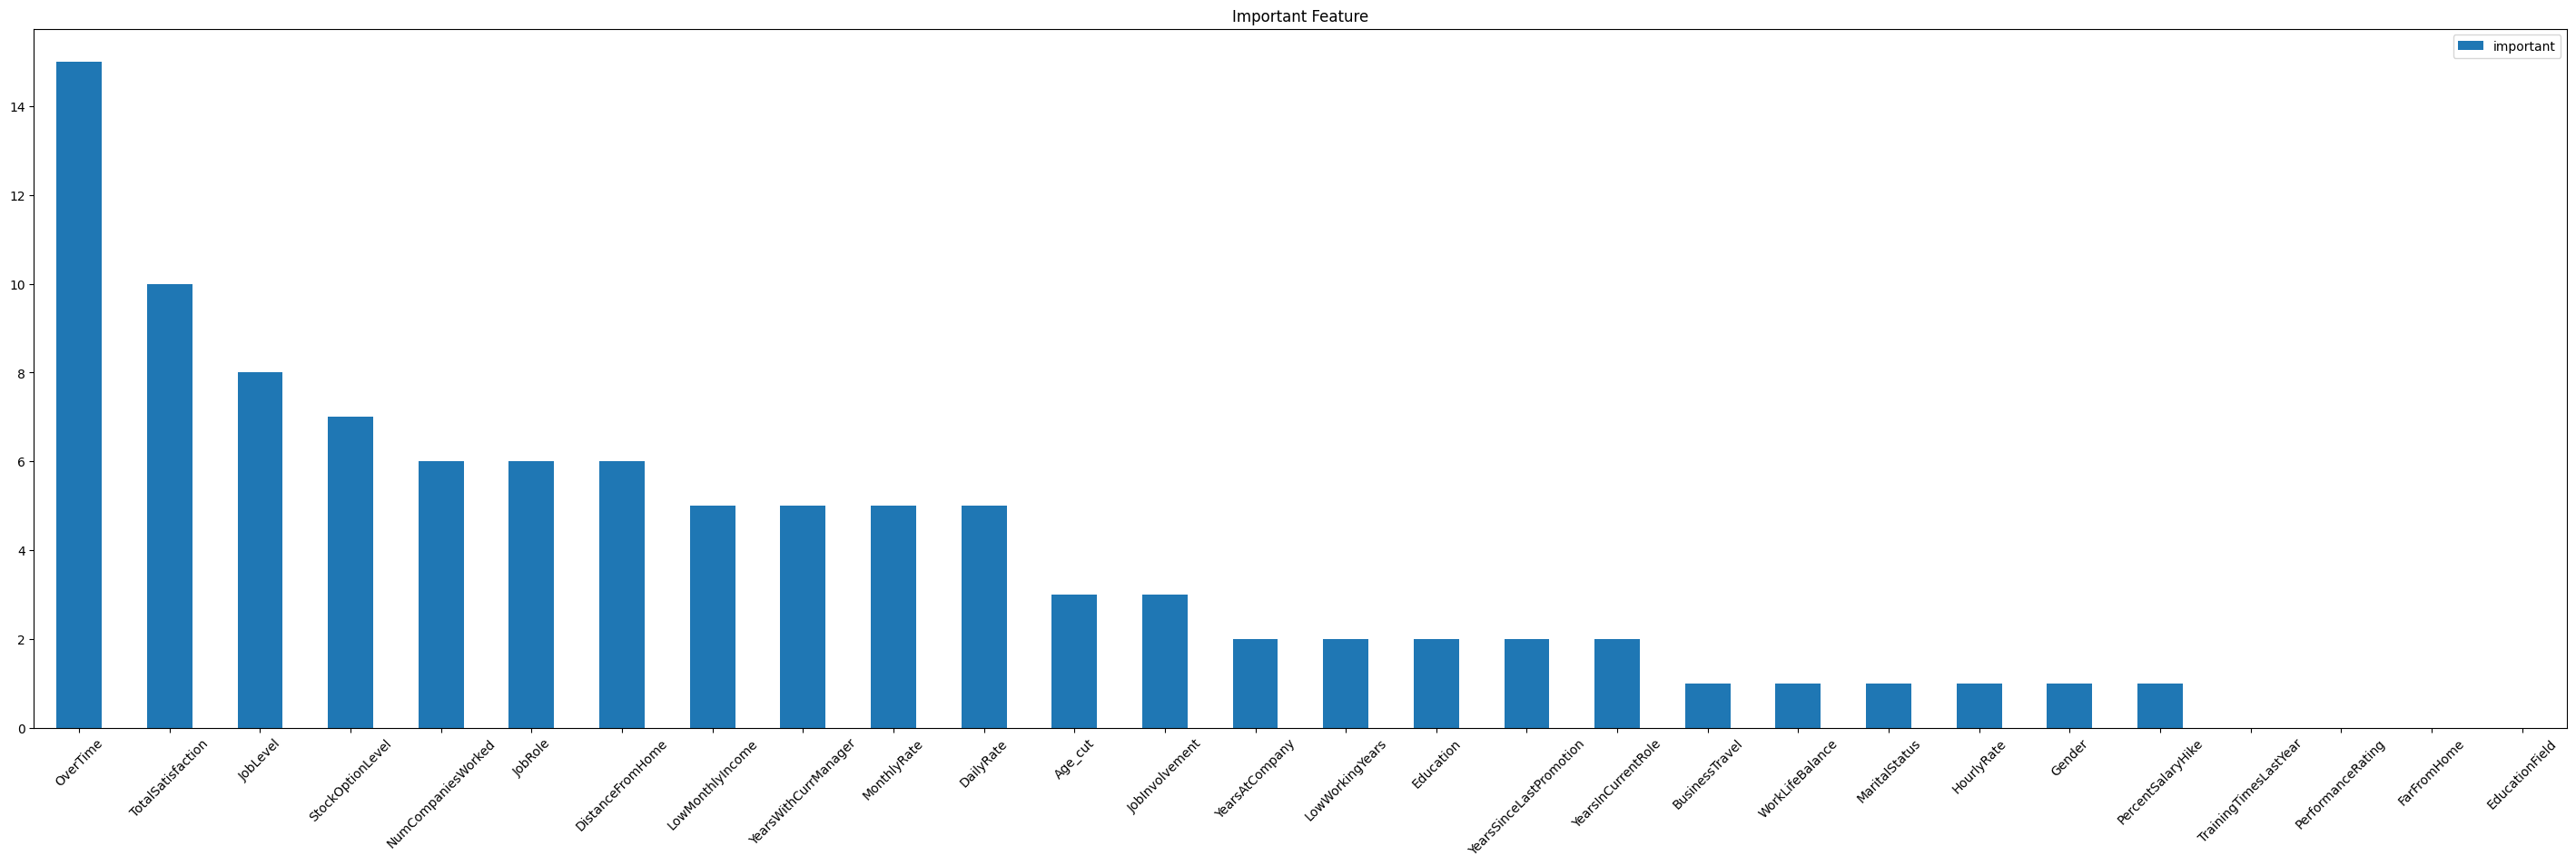

In [ ]:
feature_importance = lgbm_best_model.feature_importances_

pd.DataFrame(feature_importance, X_train.columns,columns=['important']).sort_values(by = 'important', ascending=False).plot(kind='bar', figsize = (36, 10), rot = 45, title ='Important Feature')
plt.show()

In [9]:
param_grid = {
    'penalty': ['l1', 'l2'],  # 규제 유형
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 규제 강도의 역수
    'solver': ['liblinear', 'saga']  # 최적화 알고리즘
}

random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs = -1,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score = True,
    random_state=42
)

random_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LogisticRegression(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [10]:
lr_best_model = random_search.best_estimator_
lr_best_params = random_search.best_params_

lr_best_model.fit(X_train, Y_train)
lr_predict = lr_best_model.predict(X_test)
# model_score(Y_test, lr_predict)
print(lr_best_params)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}


In [51]:
no_indices = np.where(lr_predict == "No")[0]  # No로 예측된 데이터의 인덱스

reset_X_test = X_test.reset_index(drop = True)
percent = []
no_proba = lr_best_model.predict_proba(reset_X_test.iloc[no_indices])
# no_proba['NoPredict'] = 
for i, prob in zip(no_indices, no_proba):
    yes_prob = prob[1]  # "Yes" 클래스에 속할 확률
    no_prob = prob[0]  # "No" 클래스에 속할 확률
    print(f"데이터 포인트 {i}의 Yes 확률: {(yes_prob/0.5) * 100}%")
    percent.append(yes_prob/0.5 * 100)
    print()


데이터 포인트 0의 Yes 확률: 60.55733664759916%

데이터 포인트 1의 Yes 확률: 11.898054339318247%

데이터 포인트 2의 Yes 확률: 20.504300628374374%

데이터 포인트 3의 Yes 확률: 1.6780753629778968%

데이터 포인트 4의 Yes 확률: 17.444483691895716%

데이터 포인트 5의 Yes 확률: 22.305759963759815%

데이터 포인트 6의 Yes 확률: 3.144633337707444%

데이터 포인트 7의 Yes 확률: 15.493414533219404%

데이터 포인트 8의 Yes 확률: 12.577391847985902%

데이터 포인트 9의 Yes 확률: 18.497096834287383%

데이터 포인트 10의 Yes 확률: 18.787229335326465%

데이터 포인트 11의 Yes 확률: 22.51304633559291%

데이터 포인트 12의 Yes 확률: 8.046453108376692%

데이터 포인트 13의 Yes 확률: 20.197252859048625%

데이터 포인트 14의 Yes 확률: 5.483905191248142%

데이터 포인트 15의 Yes 확률: 60.7156963487706%

데이터 포인트 16의 Yes 확률: 1.7959560598606972%

데이터 포인트 17의 Yes 확률: 34.58053090053211%

데이터 포인트 18의 Yes 확률: 20.772447083044625%

데이터 포인트 19의 Yes 확률: 10.491630493544973%

데이터 포인트 20의 Yes 확률: 25.43200522164434%

데이터 포인트 21의 Yes 확률: 73.61673437794563%

데이터 포인트 23의 Yes 확률: 41.93316016392305%

데이터 포인트 24의 Yes 확률: 13.408257726760167%

데이터 포인트 25의 Yes 확률: 2.577410511766544

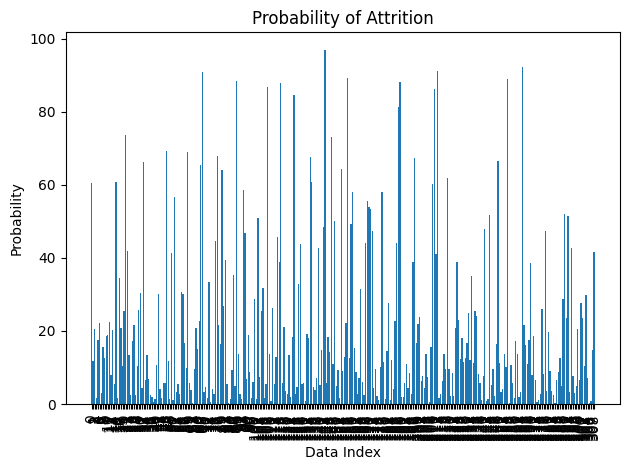

In [52]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Yes', 'No']
x = np.arange(len(percent))  # x축 위치

plt.bar(x, percent)
plt.xlabel('Data Index')
plt.ylabel('Probability')
plt.title('Probability of Attrition')
plt.xticks(x, x, rotation='vertical')
plt.tight_layout()
plt.show()


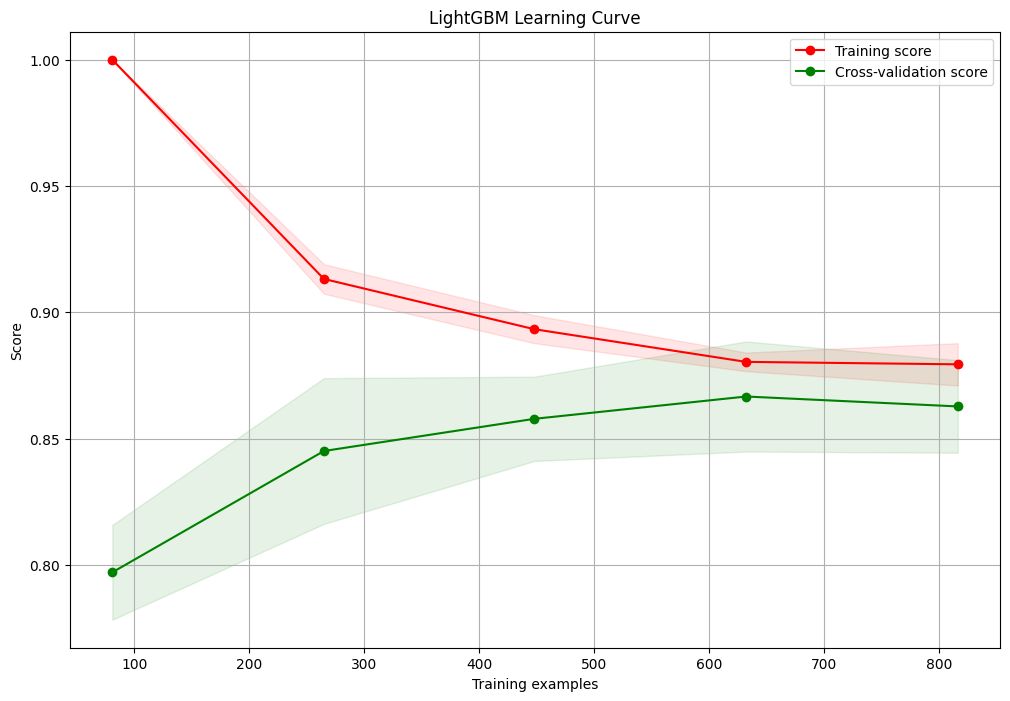

In [ ]:
plot_learning_curve(lr_best_model, 'LightGBM Learning Curve', X_train, Y_train, cv=5)

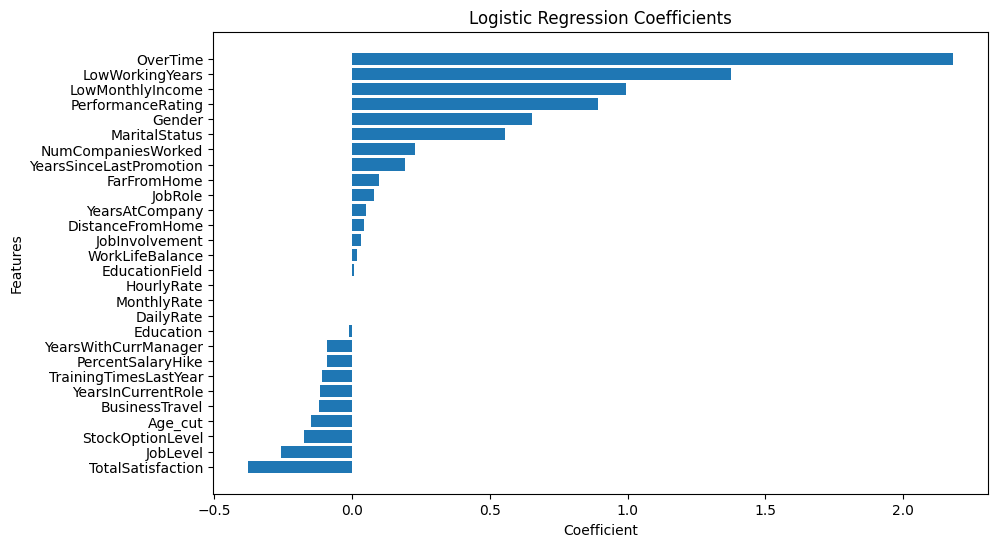

In [ ]:
coefficients = lr_best_model.coef_[0]
feature_names = np.array(X.columns)

# 회귀 계수를 기준으로 특성 정렬
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 막대 그래프로 회귀 계수 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.show()

In [ ]:
totalSatisfacation = X['TotalSatisfaction'].copy()

other = X['OverTime'].copy()

In [ ]:
X

,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cut,FarFromHome,LowMonthlyIncome,LowWorkingYears,TotalSatisfaction
0,2,1102,1,2,1,0,94,0,2,7,...,0,6,4,0,5,2,0,0,0,4
1,1,279,8,1,1,1,61,2,2,6,...,2,10,7,1,7,3,0,0,0,6
2,2,1373,2,2,4,1,92,2,1,2,...,2,0,0,0,0,2,0,1,0,6
3,1,1392,3,4,1,0,56,0,1,6,...,2,8,7,3,0,1,0,1,0,7
4,2,591,2,1,3,1,40,0,1,2,...,2,2,2,2,2,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,1,884,23,2,3,1,41,3,2,2,...,2,5,2,0,3,2,1,1,0,7
1357,2,613,6,1,3,1,42,2,3,0,...,2,7,7,1,7,2,0,0,0,3
1358,2,155,4,0,1,1,87,3,2,4,...,2,6,2,0,3,1,0,0,0,3
1359,1,1023,2,0,3,1,63,2,2,7,...,3,9,6,0,8,3,0,0,0,7


In [ ]:
other_train, other_test, satisfacation_train, satisfacation_test = train_test_split(other, totalSatisfacation, random_state=42)

other_train_reshaped = other_train.values.reshape(-1, 1)
other_test_reshaped = other_test.values.reshape(-1, 1)

In [7]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
model = LinearRegression()

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': np.arange(1, 5)
}

# 랜덤 서치 수행
random_search = RandomizedSearchCV(model, param_space, n_iter=10, cv=5)
random_search.fit(other_train_reshaped, satisfacation_train)

# 최적 모델 및 파라미터 출력
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)


NameError: ignored

In [ ]:
from sklearn.metrics import r2_score
model.fit(other_train_reshaped, satisfacation_train)
train_predictions = model.predict(other_train_reshaped)

# 테스트 데이터에 대한 예측
test_predictions = model.predict(other_test_reshaped)

# 훈련 데이터의 R² 점수 계산
train_score = r2_score(satisfacation_train, train_predictions)

# 테스트 데이터의 R² 점수 계산
test_score = r2_score(satisfacation_test, test_predictions)

print("훈련 점수 (R²):", train_score)
print("테스트 점수 (R²):", test_score)

훈련 점수 (R²): 0.003653676361008773
테스트 점수 (R²): 0.009330184835540267


In [ ]:
from sklearn.svm import SVC

svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(other_train, satisfacation_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_

predictions = best_model.predict(other_test)
test_score = accuracy_score(satisfacation_test, predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print(test_score)

0.187683284457478


In [6]:
attrition_yes_data = data[data['Attrition'] == 'Yes']

attrition_yes_data = attrition_yes_data.reset_index(drop = True)

attrition_yes_data

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobLevel,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cut,FarFromHome,LowMonthlyIncome,LowWorkingYears,TotalSatisfaction
0,Yes,Travel_Rarely,1102,1,College,Life Sciences,Female,94,High,2,...,Bad,6,4,0,5,2,0,0,0,4
1,Yes,Travel_Rarely,1373,2,College,Other,Male,92,Medium,1,...,Better,0,0,0,0,2,0,1,0,6
2,Yes,Travel_Rarely,103,24,Bachelor,Life Sciences,Male,50,Medium,1,...,Better,4,2,0,3,1,1,1,0,5
3,Yes,Travel_Rarely,1218,9,Master,Life Sciences,Male,82,Medium,1,...,Better,5,3,0,3,2,0,0,0,3
4,Yes,Travel_Rarely,699,6,Below College,Medical,Male,83,High,1,...,Better,4,2,1,3,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Yes,Travel_Frequently,638,9,Bachelor,Marketing,Male,33,High,1,...,Good,1,0,1,0,0,0,1,1,3
223,Yes,Travel_Rarely,1092,1,Master,Medical,Male,36,High,1,...,Best,2,2,2,2,1,0,0,0,4
224,Yes,Travel_Rarely,310,7,College,Technical Degree,Male,72,High,1,...,Bad,10,9,9,8,4,0,1,0,8
225,Yes,Travel_Frequently,878,1,Master,Life Sciences,Male,94,High,2,...,Better,6,3,0,1,3,0,0,0,6


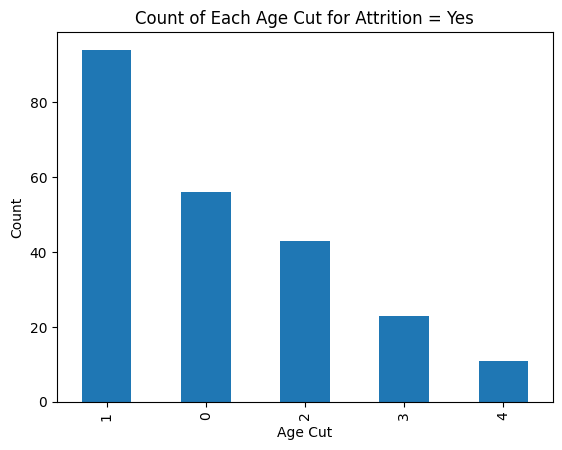

In [ ]:
attrition_yes_data['Age_cut'].value_counts().plot(kind='bar')
plt.xlabel('Age Cut')
plt.ylabel('Count')
plt.title('Count of Each Age Cut for Attrition = Yes')
plt.show()

In [ ]:
data_age_20 = data[data['Age_cut']==0].reset_index(drop = True)

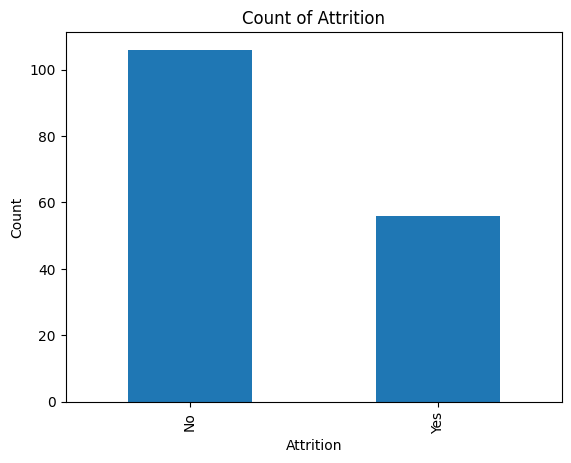

In [ ]:
import seaborn as sns


attrition_counts = data_age_20['Attrition'].value_counts()

attrition_counts.plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Count of Attrition')
plt.show()

In [ ]:
data_age_30 = data[data['Age_cut']==1].reset_index(drop = True)

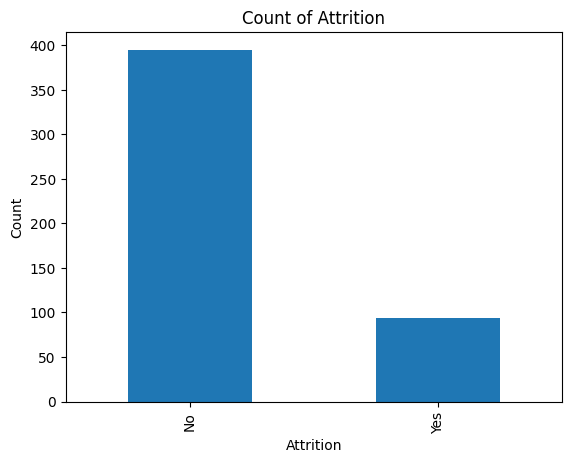

In [ ]:
attrition_counts = data_age_30['Attrition'].value_counts()

attrition_counts.plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Count of Attrition')
plt.show()